In [9]:
import numpy as np
import torch
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

The Hu-Sawicky system is given by

$$
\begin{align}
\frac{dx}{dz} &= \frac{1}{z+1}(-\Omega-2v+x+4y+xv+x^2) \\
\frac{dy}{dz} &= \frac{1}{z+1}(vx\Gamma(r)-xy+4y-2yv) \\
\frac{dv}{dz} &= \frac{-v}{z+1}(x\Gamma(r)+4-2v) \\
\frac{d\Omega}{dz} &= \frac{\Omega}{z+1}(-1+2v+x) \\
\frac{dr}{dz} &= \frac{r\Gamma(r)x}{z+1}
\end{align}
$$

where

$$
\Gamma(r) = \frac{(r+b)\left((r+b)^2 - 2b \right)}{4br}, \quad z \in [0,z_0]
$$

In [2]:
#Gamma = lambda r, b: (r + b)*(((r + b)**2) - 2*b)/(4*r*b)
Gamma = lambda r_prime, b: (np.exp(r_prime) + b)*(((np.exp(r_prime) + b)**2) - 2*b)/(4*b*np.exp(r_prime))

def _hu_sawicky_system(z, u, b=1.0):
    x, y, v, Om, r = u[0], u[1], u[2], u[3], u[4]
    r_prime = np.log(r)
    Gam = Gamma(r_prime, b)
    rhs1 = (-Om - 2*v + x + 4*y + x*v + x**2)/(z + 1)
    rhs2 = (v*x*Gam - x*y + 4*y - 2*y*v)/(z + 1)
    rhs3 = -v*(x*Gam + 4 - 2*v)/(z + 1)
    rhs4 = Om*(-1 + 2*v + x)/(z + 1)
    #rhs5 = r*Gam*x/(z + 1)
    rhs5 = Gam*x/(z + 1)
    return np.array([rhs1, rhs2, rhs3, rhs4, rhs5])

def get_solution(z_0, Om_m_0, b=1.0):
    Om_L_0 = 1 - Om_m_0
    x_0 = 0
    y_0 = (Om_m_0*((1 + z_0)**3) + 2*Om_L_0)/(2*(Om_m_0*((1 + z_0)**3) + Om_L_0))
    v_0 = (Om_m_0*((1 + z_0)**3) + 4*Om_L_0)/(2*(Om_m_0*((1 + z_0)**3) + Om_L_0))
    Om_0 = Om_m_0*((1 + z_0)**3)/((Om_m_0*((1 + z_0)**3) + Om_L_0))
    r_0 = (Om_m_0*((1 + z_0)**3) + 4*Om_L_0)/Om_L_0
    sys = solve_ivp(
        _hu_sawicky_system,
        t_span = (0, z_0),
        y0 = [x_0, y_0, v_0, Om_0, r_0],
        dense_output=True,
        atol=1e-8,
        rtol=1e-8
    )
    z = np.linspace(0, z_0, 100)
    sol = system.sol(z)
    return sys, sol

In [3]:
try:
    hu_sawicky_sol = np.load("hu_sawicky_sol.npy", allow_pickle=True).item()
except:
    hu_sawicky_sol = np.transpose(np.loadtxt("b=1_omega=0.26.txt"))

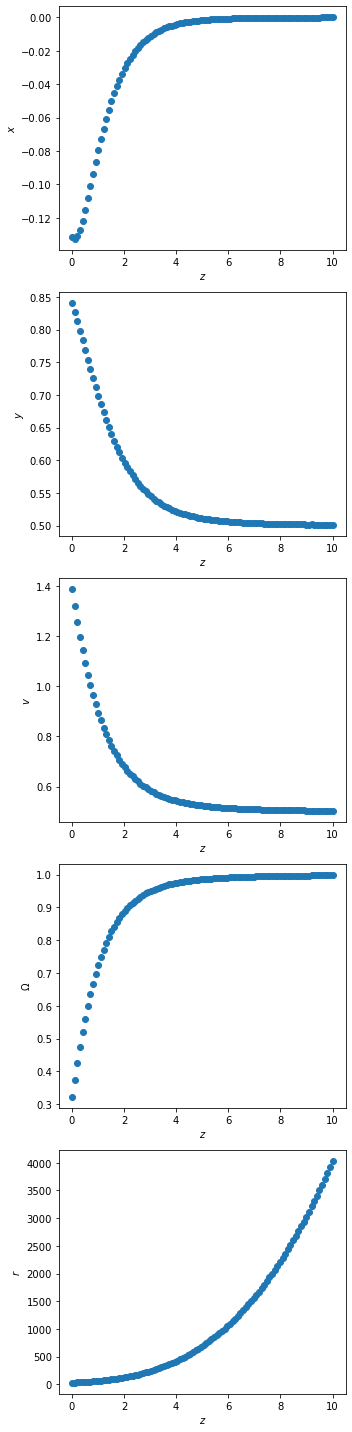

In [8]:
fig, axs = plt.subplots(5, 1, figsize=(5,20))
var_names = ["$x$", "$y$", "$v$", "$\Omega$", "$r$"]
for i, ax in enumerate(axs):
    ax.scatter(hu_sawicky_sol[0], hu_sawicky_sol[i+1])
    ax.set_ylabel(var_names[i])
    ax.set_xlabel("$z$")
plt.tight_layout()

In [14]:
torch.tensor(hu_sawicky_sol[1:]).T.shape

torch.Size([100, 5])